# Conexão com postgres e Relatorios do sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos



In [11]:
#!pip install pandas
#!pip install seaborn
#!pip install psycopg2-binary

### Importando bibliotecas


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [13]:
conn = psycopg2.connect(host="motty.db.elephantsql.com",database="gshqrvpq", user="gshqrvpq", password="AQ36xYHbCASn7K_zm2JmWuMavIwirFN4")

In [14]:
conn

<connection object at 0x7f43216a2b90; dsn: 'user=gshqrvpq password=xxx dbname=gshqrvpq host=motty.db.elephantsql.com', closed: 0>

#Relatórios

# ==========================================================================================
## Relatório 1
### Objetivo: Relatório de lojas cadastradas incluindo as seguintes informações: nome da loja e o endereço da loja.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("SELECT pessoa.idpessoa, pessoa.dscnompessoa, pessoa.endereco FROM mydb.pessoa INNER JOIN mydb.catalogo ON(pessoa.idpessoa = catalogo.pessoa_idpessoa) GROUP BY pessoa.idpessoa", conn)
res

,idpessoa,dscnompessoa,endereco
0,15,Belo Tricot,Avenida Neymar Junior - 2022
1,14,Q Beleza,Avenida Cristiano Ronaldo - 2222
2,13,Elegance,Avenida Bento Brigadeiro - 208
3,11,Game Over,Avenida Professor Herminio Blackman - 225
4,12,Lótus,Rua dos Laranjais - 1008


#==========================================================================================
## Relatório 2
### Objetivo: Relatório que informe quais as lojas que mais venderam e quanto cada uma vendeu.
Código para obtenção do resultado:

In [5]:
res = pd.read_sql_query("SELECT pessoa.idpessoa, pessoa.dscnompessoa, SUM(itensvendidos.dscqtd) as TotalVendas FROM mydb.pessoa INNER JOIN mydb.catalogo ON(pessoa.idpessoa = catalogo.pessoa_idpessoa) INNER JOIN mydb.itensvendidos ON(catalogo.idcatalogo = itensvendidos.catalogo_idcatalogo) GROUP BY pessoa.idpessoa ORDER BY SUM(itensvendidos.dscqtd) DESC", conn)
res

,idpessoa,dscnompessoa,totalvendas
0,11,Game Over,4
1,15,Belo Tricot,3
2,14,Q Beleza,2
3,13,Elegance,1


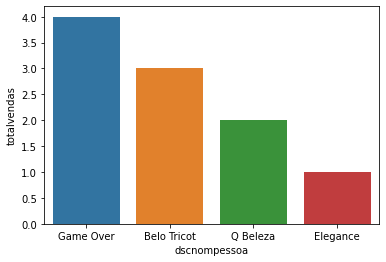

In [6]:
sns.barplot(x= 'dscnompessoa', y= 'totalvendas', data = res)

# ==========================================================================================
## Relatório 3
### Objetivo: Relatório dos produtos que mais venderam e quanto cada um vendeu com o seu respectivo nome.
Código para obtenção do resultado:

In [18]:
res = pd.read_sql_query("SELECT produto.dscproduto, SUM(itensvendidos.dscqtd) AS TotalVendas FROM mydb.produto INNER JOIN mydb.catalogo ON(produto.idproduto = catalogo.produto_idproduto) INNER JOIN mydb.itensvendidos ON(itensvendidos.catalogo_idcatalogo = catalogo.idcatalogo) GROUP BY produto.idproduto ORDER BY SUM(itensvendidos.dscqtd) DESC", conn)
res

,dscproduto,totalvendas
0,Estojo de maquiagem,3
1,Televisão Sony 50,2
2,Calças Jeans,1
3,Camisa Polo,1
4,Vestido longo,1
5,Playstation 4,1
6,Caneca decorada,1


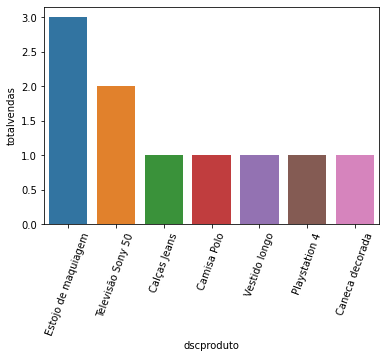

In [21]:
plt.xticks(rotation=70)
sns.barplot(x = 'dscproduto', y = 'totalvendas', data = res)

# ==========================================================================================
## Relatório 4
### Objetivo: Relatório dos clientes que mais compraram e quanto cada um comprou, com seu nome e endereço.
Código para obtenção do resultado:

In [24]:
res = pd.read_sql_query("SELECT pessoa.dscnompessoa, pessoa.endereco, SUM(itensvendidos.dscqtd) FROM mydb.pessoa INNER JOIN mydb.pedido ON(pedido.pessoa_idpessoa = pessoa.idpessoa) INNER JOIN mydb.itensvendidos ON(itensvendidos.pedido_idpedido = pedido.idpedido) GROUP BY pessoa.idpessoa ORDER BY SUM(itensvendidos.dscqtd) DESC", conn)
res

,dscnompessoa,endereco,sum
0,Mario Luiz,Rua São João - 22,4
1,Julia Gomes,Vale da Praia - 225,3
2,Paulo Andre,Rua dos Lírios - 228,2
3,Gabriel Felix,Avenida Ho Shi Min - 117,1


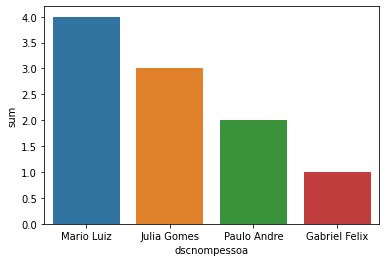

In [25]:
sns.barplot(x = 'dscnompessoa', y = 'sum', data = res)

# ==========================================================================================
## Relatório 5
### Objetivo: Relatório com as categorias de produtos mais requisitadas e quanto venderam.
Código para obtenção do resultado:

In [29]:
res = pd.read_sql_query("SELECT produto.tpproduto, SUM(itensvendidos.dscqtd) AS totalvendido FROM mydb.produto INNER JOIN mydb.catalogo ON(produto.idproduto = catalogo.produto_idproduto) INNER JOIN mydb.itensvendidos ON(itensvendidos.catalogo_idcatalogo = catalogo.idcatalogo) GROUP BY produto.tpproduto ORDER BY SUM(itensvendidos.dscqtd) DESC", conn)
res

,tpproduto,totalvendido
0,Moda e beleza,6
1,Eletrônico,2
2,Console de Videogame,1
3,Casa e decoração,1


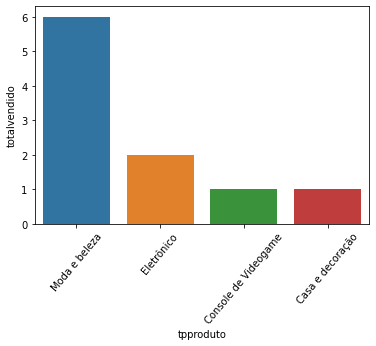

In [31]:
plt.xticks(rotation=50)
sns.barplot(x = 'tpproduto', y = 'totalvendido', data = res)